In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [8]:
df2.nunique()

title                  11231
location                3105
company_profile         1709
description            14801
requirements           11968
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [5]:
df.isna().sum() / len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [6]:
df2 = df.copy()

In [7]:
df2.drop(['salary_range', 'job_id', 'department', 'benefits'], axis = 1, inplace = True)

In [9]:
df2.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [10]:
df2 = df2.sort_values('title').reset_index(drop = True)

In [11]:
df2.isna().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [12]:
df2['employment_type'] = df2['employment_type'].bfill(axis=0)
df2['required_experience'] = df2['required_experience'].bfill(axis=0)
df2['required_education'] = df2['required_education'].bfill(axis = 0)
df2['industry'] = df2['industry'].bfill(axis=0)
df2['function'] = df2['function'].bfill(axis=0)

In [13]:
df3 = df2.copy()

In [14]:
df3 = df3[df3['description'].notna()]

In [15]:
df3.isna().sum()

title                     0
location                346
company_profile        3307
description               0
requirements           2694
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           2
required_experience       2
required_education        2
industry                  2
function                  2
fraudulent                0
dtype: int64

In [16]:
df3 = df3.dropna(axis = 0, how = 'any')

In [17]:
df3.shape

(12501, 14)

In [18]:
df3 = df3.drop_duplicates(keep = 'first')

In [19]:
df4 = df3.copy()

In [20]:
df4.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2,Piping Material Engineer,"US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,"EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1
9,AUTOCAD OPERATOR,"PH, 07, Cebu",Zylun’s mission is to help small and medium si...,Responsibilities:Using a project database syst...,Requirements:1-3 years’ experience of CAD base...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0
13,Accounting Clerk,"US, TX, AUSTIN",As the industry’s largest supply contracting c...,"Job DescriptionVerify, obtain approvals and pa...",High School diploma requiredProficient in usin...,0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1


In [21]:
df4.shape

(12264, 14)

In [22]:
df4['description'] = df4['description'] + ' ' + df4['requirements'] + ' ' + df4['company_profile']
df4.drop(['company_profile', 'requirements'], axis = 1, inplace = True)

In [23]:
df4.head(3)

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
2,Piping Material Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1


In [24]:
df4['country_code'] = df4['location'].str.split(',', expand=True)[0]
df4['city'] = df4['location'].str.split(',', expand = True)[2]

In [25]:
df4.head()

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_code,city
2,Piping Material Engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,US,Houston
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,US,Houston
4,FEA Senior engineer,"US, TX, Houston",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,US,Houston
9,AUTOCAD OPERATOR,"PH, 07, Cebu",Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,PH,Cebu
13,Accounting Clerk,"US, TX, AUSTIN","Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,US,AUSTIN


In [26]:
df4.loc[df4['city'] == ' ', 'city'] = np.nan

In [27]:
df4.isnull().sum()

title                    0
location                 0
description              0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          0
required_experience      0
required_education       0
industry                 0
function                 0
fraudulent               0
country_code             0
city                   992
dtype: int64

In [28]:
df4.dropna(inplace = True)

In [29]:
import pycountry
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
def country(df):
    if df['country_code'] in list_alpha_2:
        return pycountry.countries.get(alpha_2 = df['country_code']).name
df4['country_name'] = df4.apply(country, axis = 1)

In [30]:
df4.drop(['location', 'country_code'], axis = 1, inplace = True)

In [31]:
df4.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States


In [32]:
df4.shape

(11272, 13)

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

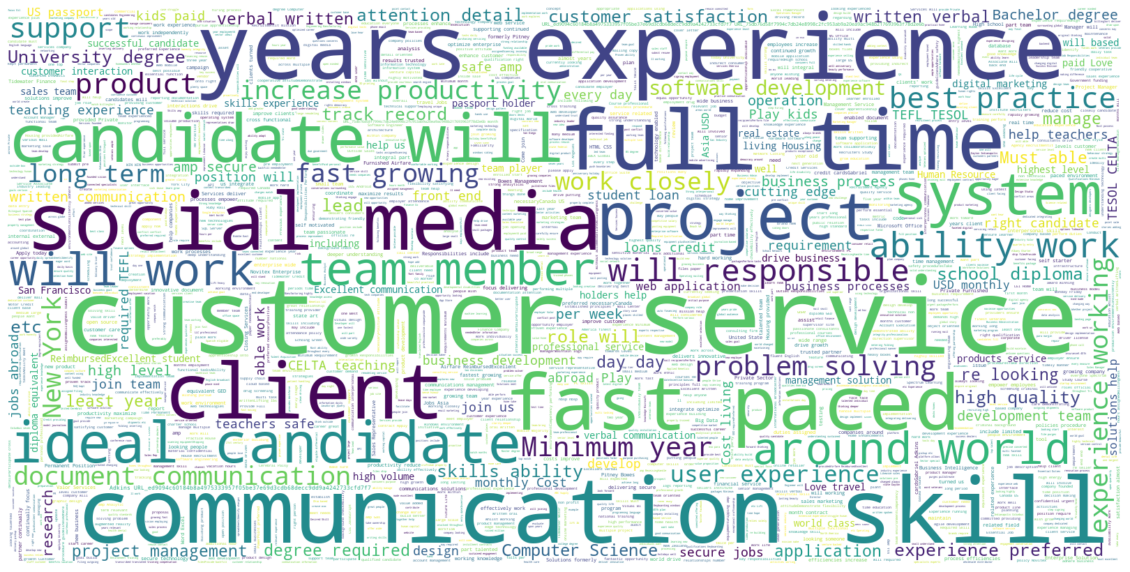

In [85]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = "white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df4[df4.fraudulent == 0]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('no_fraud_cloud.jpeg')

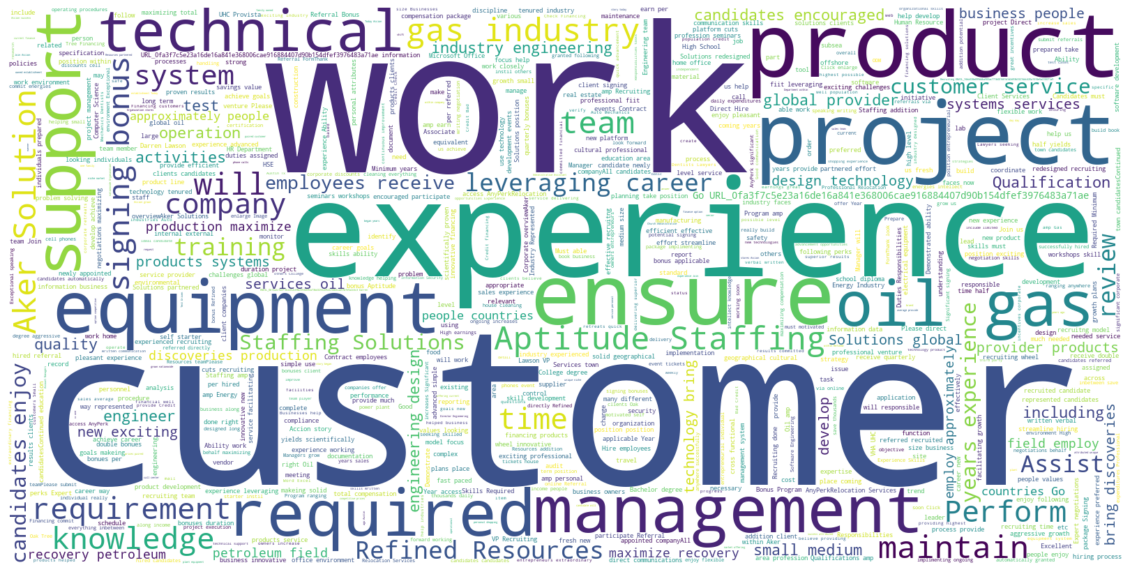

In [84]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="white", stopwords=stopwords, width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df4[df4.fraudulent == 1]['description']))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.savefig('fraud_cloud.jpeg')

In [33]:
df_clean = df4.copy()

In [34]:
df_clean.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,city,country_name
2,Piping Material Engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
3,"Discipline Manager Civil, Structural, Marine...",Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,Houston,United States
4,FEA Senior engineer,Corporate overviewAker Solutions is a global p...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,Houston,United States
9,AUTOCAD OPERATOR,Responsibilities:Using a project database syst...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Staffing and Recruiting,Engineering,0,Cebu,Philippines
13,Accounting Clerk,"Job DescriptionVerify, obtain approvals and pa...",0,1,1,Full-time,Associate,High School or equivalent,Accounting,Customer Service,1,AUSTIN,United States
